In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

In [3]:
#Importing Dataset

In [4]:
df= pd.read_csv("ILPD.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# EDA

In [6]:
print("Dataset Shape: ", df.shape)

Dataset Shape:  (583, 11)


In [7]:
print("\nColumns: ", df.columns)


Columns:  Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [8]:
# Mapping 'Male' to 1 and 'Female' to 0 in the 'Gender of the patient' column
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# No liver disease then:=0 for having liver disease then:=1
df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})

Number of patients that are male:  441
Number of patients that are female:  142


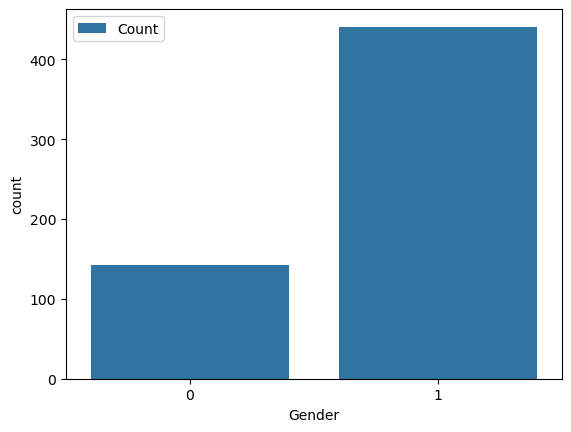

In [9]:
# Plotting the Number of Male and Female patients
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


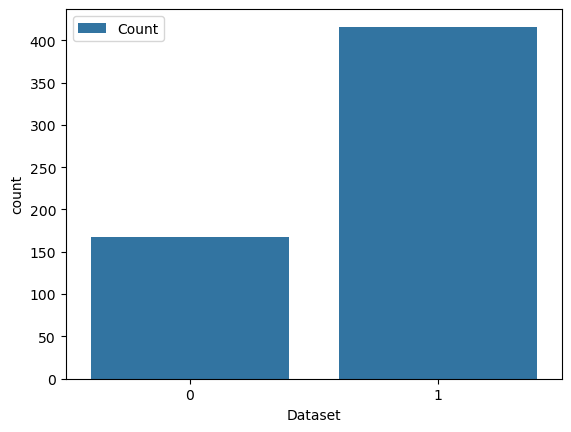

In [10]:
# Plotting the Number of patients with liver disease vs Number of patients with no liver disease
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [12]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [13]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [14]:
#Correlation

In [15]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003424,0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


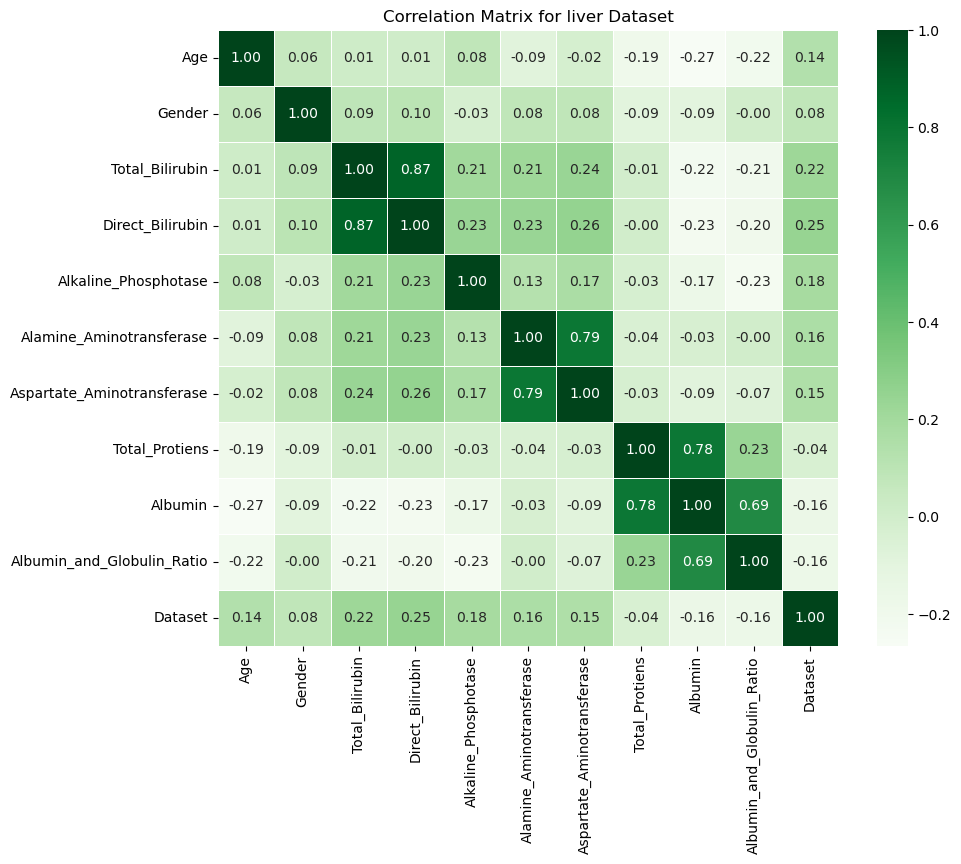

In [16]:
corr_matrix = df.corr()

# Ploting the corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for liver Dataset")
plt.show()

In [17]:
df= df.dropna()
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [18]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         566 non-null    int64  
 1   Gender                      566 non-null    int64  
 2   Total_Bilirubin             566 non-null    float64
 3   Direct_Bilirubin            566 non-null    float64
 4   Alkaline_Phosphotase        566 non-null    int64  
 5   Alamine_Aminotransferase    566 non-null    int64  
 6   Aspartate_Aminotransferase  566 non-null    int64  
 7   Total_Protiens              566 non-null    float64
 8   Albumin                     566 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     566 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 53.1 KB


In [19]:
df.shape


(566, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

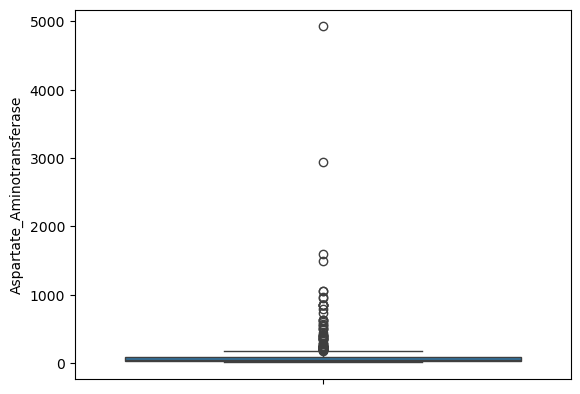

In [20]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [21]:
df = df[df.Aspartate_Aminotransferase<=2500]
df.shape

(564, 11)

# Data Preparation

In [23]:
#spliting dataset into train and test
from sklearn.model_selection import train_test_split
X = df.drop('Dataset', axis=1)
y = df['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [24]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(451, 10)
(451,)
(113, 10)
(113,)


# Machine Learning Models

# GB Boost

In [27]:
# Gradient Boosting (GB)
gb_model = GradientBoostingClassifier(learning_rate=0.01)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)
print(classification_report(y_test, gb_model.predict(X_test)))

Gradient Boosting Accuracy: 0.7433628318584071
              precision    recall  f1-score   support

           0       0.14      0.04      0.06        24
           1       0.78      0.93      0.85        89

    accuracy                           0.74       113
   macro avg       0.46      0.49      0.46       113
weighted avg       0.65      0.74      0.68       113



Text(0.5, 1.0, 'Confusion Matrix')

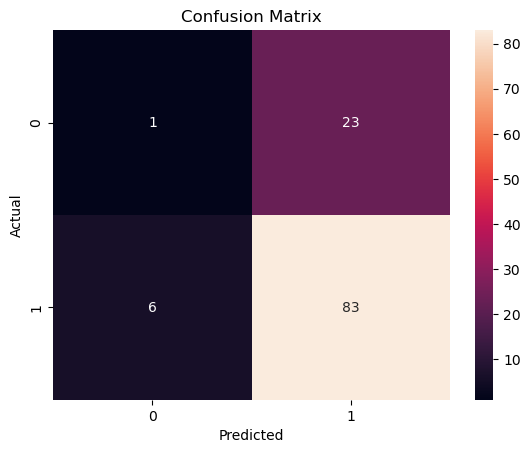

In [28]:
#print(confusion_matrix(y_test, gb_model.predict(X_test)))
rf_predicted = gb_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# ADAPTIBVE BOOSTING

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ab_model = AdaBoostClassifier(learning_rate=0.1)
ab_model.fit(X_train, y_train)

ab_predictions = ab_model.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_predictions)
print("AdaBoost Accuracy:", ab_accuracy)
print(classification_report(y_test, ab_model.predict(X_test)))

AdaBoost Accuracy: 0.7876106194690266
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.79      1.00      0.88        89

    accuracy                           0.79       113
   macro avg       0.39      0.50      0.44       113
weighted avg       0.62      0.79      0.69       113



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matrix')

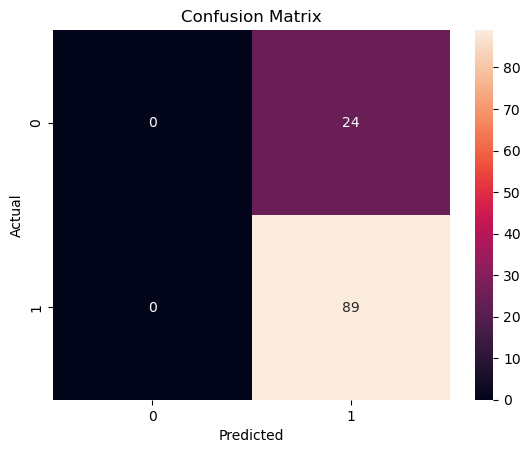

In [31]:
#print(confusion_matrix(y_test, gb_model.predict(X_test)))
rf_predicted = ab_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# LOGIT BOOST

In [33]:


from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the AdaBoost classifier with Logistic Regression as the base estimator
logit_boost_model = AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000))
logit_boost_model.fit(X_train, y_train)

# Predictions and evaluation
logit_boost_predictions = logit_boost_model.predict(X_test)
logit_boost_accuracy = accuracy_score(y_test, logit_boost_predictions)

print("Logit Boost Accuracy:", logit_boost_accuracy)
print(classification_report(y_test, logit_boost_predictions))

Logit Boost Accuracy: 0.7522123893805309
              precision    recall  f1-score   support

           0       0.41      0.38      0.39        24
           1       0.84      0.85      0.84        89

    accuracy                           0.75       113
   macro avg       0.62      0.61      0.62       113
weighted avg       0.74      0.75      0.75       113



Text(0.5, 1.0, 'Confusion Matrix')

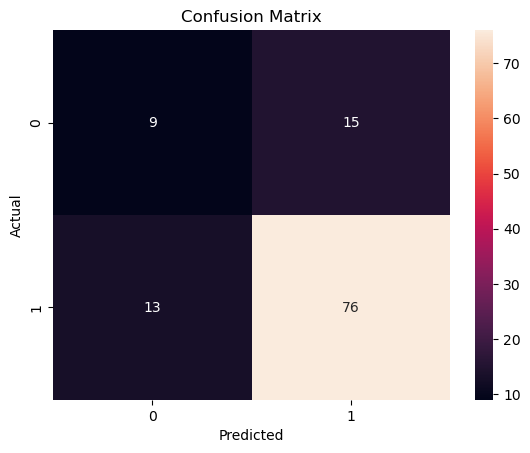

In [34]:
rf_predicted = logit_boost_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Stochastic boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Instantiate the Gradient Boosting classifier with subsampling for stochastic boosting
sgb_model = GradientBoostingClassifier(subsample=0.8,learning_rate=0.01)
sgb_model.fit(X_train, y_train)
sgb_predictions = sgb_model.predict(X_test)
sgb_accuracy = accuracy_score(y_test, sgb_predictions)
print("Stochastic Gradient Boosting Accuracy:", sgb_accuracy)
print(classification_report(y_test, sgb_model.predict(X_test)))

Stochastic Gradient Boosting Accuracy: 0.7433628318584071
              precision    recall  f1-score   support

           0       0.14      0.04      0.06        24
           1       0.78      0.93      0.85        89

    accuracy                           0.74       113
   macro avg       0.46      0.49      0.46       113
weighted avg       0.65      0.74      0.68       113



Text(0.5, 1.0, 'Confusion Matrix')

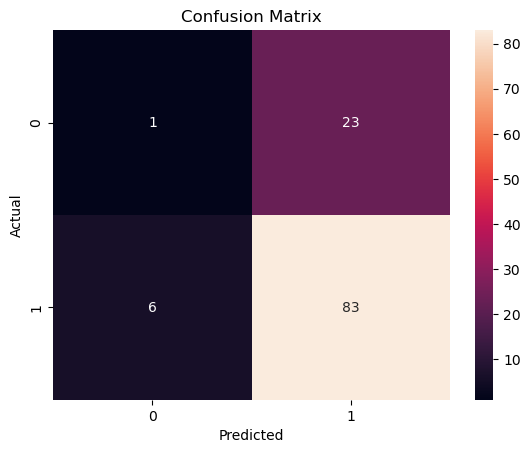

In [37]:
rf_predicted = sgb_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [38]:
#XGB Boost

In [39]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_predictions))


XGBoost Accuracy: 0.6194690265486725
              precision    recall  f1-score   support

           0       0.21      0.29      0.25        24
           1       0.79      0.71      0.75        89

    accuracy                           0.62       113
   macro avg       0.50      0.50      0.50       113
weighted avg       0.67      0.62      0.64       113



Text(0.5, 1.0, 'Confusion Matrix')

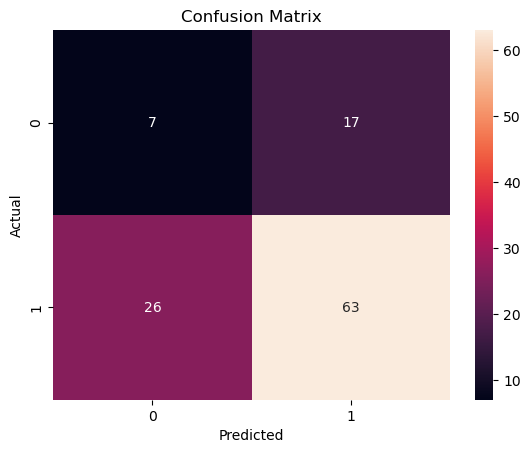

In [41]:
rf_predicted = xgb_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [42]:
#Light GBM

In [43]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [44]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the LightGBM model
lgbm_model = LGBMClassifier(learning_rate=0.01)
lgbm_model.fit(X_train, y_train)

# Make predictions
lgbm_predictions = lgbm_model.predict(X_test)

# Evaluate the model
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
print("LightGBM Accuracy:", lgbm_accuracy)
print(classification_report(y_test, lgbm_predictions))


[LightGBM] [Info] Number of positive: 313, number of negative: 138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 451, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.694013 -> initscore=0.818950
[LightGBM] [Info] Start training from score 0.818950
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

Text(0.5, 1.0, 'Confusion Matrix')

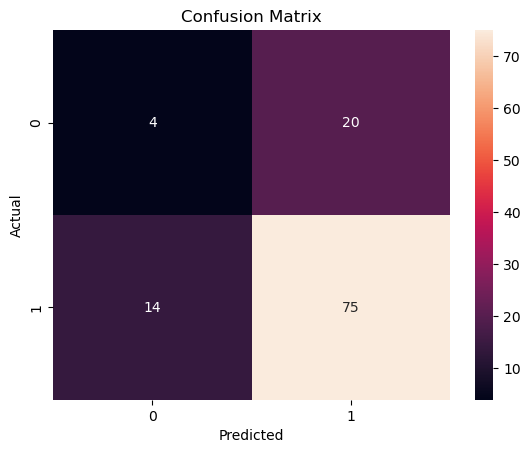

In [45]:
rf_predicted = lgbm_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [46]:
#cat Boost

In [47]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(learning_rate=0.01, verbose=0)  # Set verbose=0 to suppress training output
catboost_model.fit(X_train, y_train)

# Make predictions
catboost_predictions = catboost_model.predict(X_test)

# Evaluate the model
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)
print(classification_report(y_test, catboost_predictions))


CatBoost Accuracy: 0.6902654867256637
              precision    recall  f1-score   support

           0       0.28      0.29      0.29        24
           1       0.81      0.80      0.80        89

    accuracy                           0.69       113
   macro avg       0.54      0.54      0.54       113
weighted avg       0.69      0.69      0.69       113



Text(0.5, 1.0, 'Confusion Matrix')

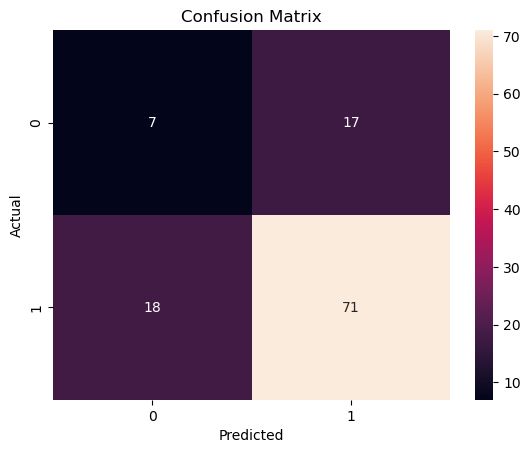

In [49]:
rf_predicted = catboost_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [50]:
import pandas as pd

accuracy_data = {
    'Model': ['Gradient Boosting', 'Adaptive Boosting', 'Logit Boosting',
              'SGBOOST','XGBoost','LightGbm','CatBoost'],
    'Accuracy': [ gb_accuracy,ab_accuracy,logit_boost_accuracy, sgb_accuracy,xgb_accuracy,lgbm_accuracy,catboost_accuracy]
}
accuracy_df = pd.DataFrame(accuracy_data)

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print(accuracy_df)

               Model  Accuracy
1  Adaptive Boosting  0.787611
2     Logit Boosting  0.752212
0  Gradient Boosting  0.743363
3            SGBOOST  0.743363
5           LightGbm  0.699115
6           CatBoost  0.690265
4            XGBoost  0.619469


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5712\202695844.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x="Model", y="Accuracy", data=df, palette="Greens")


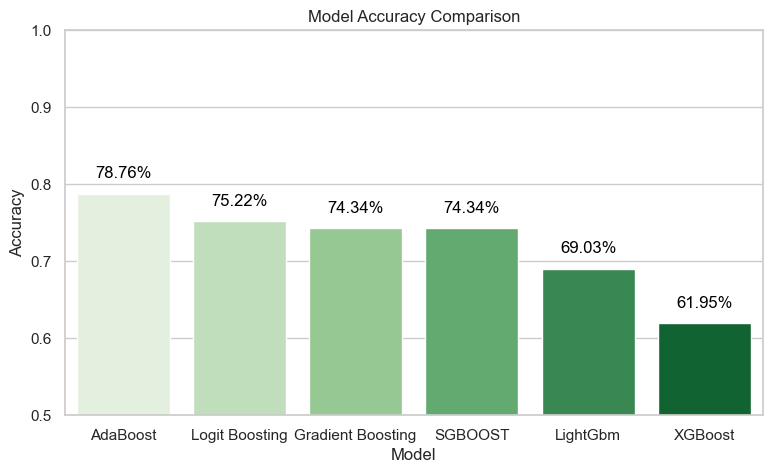

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Corrected Data
data = {
    "Model": ["Gradient Boosting", "AdaBoost", "Logit Boosting", "SGBOOST", "XGBoost", "LightGbm"],  # 6 entries
    "Accuracy": [0.743363, 0.787611, 0.752212, 0.743363, 0.619469, 0.690265]  # 6 entries
}

df = pd.DataFrame(data)
df = df.sort_values(by="Accuracy", ascending=False)

# Set the style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(9, 5))
bars = sns.barplot(x="Model", y="Accuracy", data=df, palette="Greens")

# Add percentages on top of each bar
for i, acc in enumerate(df["Accuracy"]):
    bars.text(i, acc + 0.02, f"{acc * 100:.2f}%", ha="center", fontsize=12, color="black")

# Set labels and title
plt.ylim(0.5, 1)  # Adjust the y-axis range for better visibility
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

plt.show()
